 # This Dataset is From the Official Belgian Trains, The Data can be publically asessed at: https://opendata.infrabel.be/explore/dataset/stiptheid-gegevens-maandelijksebestanden/table/

Identifier of Dataset: stiptheid-gegevens-maandelijksebestanden

In [1]:
import numpy as np
import pandas as pd

In [2]:
import torch
torch.device('mps')

device(type='mps')

In [3]:
import dask.dataframe as dd
raw_trains_df = dd.read_csv(["data/Trains_Belgium/Data_raw_punctuality_202403.csv"], assume_missing=True).compute()
#,"data/Trains_Belgium/Data_raw_punctuality_202404.csv","data/Trains_Belgium/Data_raw_punctuality_202405.csv"

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.12/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
#raw_trains_df = raw_trains_df[raw_trains_df['RELATION_DIRECTION']=='IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL']

raw_trains_df = raw_trains_df[raw_trains_df['RELATION']=='IC 02']

In [5]:
raw_trains_df = raw_trains_df.iloc[:1000]

In [6]:
raw_trains_df.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DELAY_ARR,DELAY_DEP,CIRC_TYP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
0,01MAR2024,1813.0,IC 02,SNCB/NMBS,929.0,NaN,50A,NaN,13:10:05,NaN,...,NaN,65.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,OOSTENDE,NaN,NaN,01MAR2024,NaN,01MAR2024
1,01MAR2024,1813.0,IC 02,SNCB/NMBS,210.0,=,50A,13:22:34,13:27:44,13:22:00,...,34.0,164.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,BRUGGE,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
2,01MAR2024,1813.0,IC 02,SNCB/NMBS,931.0,D,50A,13:31:20,13:31:20,13:29:00,...,140.0,140.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,OOSTKAMP,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
3,01MAR2024,1813.0,IC 02,SNCB/NMBS,127.0,P,50A,13:34:00,13:34:00,13:32:00,...,120.0,120.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,BEERNEM,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
4,01MAR2024,1813.0,IC 02,SNCB/NMBS,797.0,D,50A,13:35:57,13:35:57,13:34:00,...,117.0,117.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,MARIA-AALTER,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024


In [7]:
raw_trains_df.tail()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DELAY_ARR,DELAY_DEP,CIRC_TYP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
74709,02MAR2024,1809.0,IC 02,SNCB/NMBS,906.0,D,59,10:29:45,10:29:45,10:29:00,...,45.0,45.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,NIEUWKERKEN-WAAS,59,02MAR2024,02MAR2024,02MAR2024,02MAR2024
74710,02MAR2024,1809.0,IC 02,SNCB/NMBS,151.0,=,59,10:33:21,10:34:35,10:32:00,...,81.0,95.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,BEVEREN(WAAS),59,02MAR2024,02MAR2024,02MAR2024,02MAR2024
74711,02MAR2024,1809.0,IC 02,SNCB/NMBS,819.0,D,59,10:36:30,10:36:30,10:35:00,...,90.0,90.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,MELSELE,59,02MAR2024,02MAR2024,02MAR2024,02MAR2024
74712,02MAR2024,1809.0,IC 02,SNCB/NMBS,1278.0,D,59,10:38:07,10:38:07,10:38:00,...,7.0,7.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,ZWIJNDRECHT,59,02MAR2024,02MAR2024,02MAR2024,02MAR2024
74713,02MAR2024,1809.0,IC 02,SNCB/NMBS,64.0,=,59,10:42:08,10:43:46,10:42:00,...,8.0,46.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,ANTWERPEN-ZUID,59,02MAR2024,02MAR2024,02MAR2024,02MAR2024


In [8]:
non_null_dep = raw_trains_df.dropna(subset=['REAL_DATE_DEP','PLANNED_DATE_ARR','DELAY_ARR','DELAY_DEP'])

In [9]:
raw_trains_df[raw_trains_df['TRAIN_NO'] == 13666][['DATDEP', 'PLANNED_DATE_DEP', 'REAL_DATE_DEP', 'PTCAR_LG_NM_NL']][25:40]

,DATDEP,PLANNED_DATE_DEP,REAL_DATE_DEP,PTCAR_LG_NM_NL


Problem: DATDEP does not match PLANNED_DATE_DEP, to get Arrival-Departure Station we need to group over DATDEP & TRAIN_NO sorted by the REAL_TIME_ARR (Since first stop has NAN Arrival and Last stop has NAN Departure)

In [10]:
raw_trains_df[raw_trains_df["TRAIN_NO"] == raw_trains_df.iloc[0]["TRAIN_NO"]][:20]

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DELAY_ARR,DELAY_DEP,CIRC_TYP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
0,01MAR2024,1813.0,IC 02,SNCB/NMBS,929.0,NaN,50A,NaN,13:10:05,NaN,...,NaN,65.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,OOSTENDE,NaN,NaN,01MAR2024,NaN,01MAR2024
1,01MAR2024,1813.0,IC 02,SNCB/NMBS,210.0,=,50A,13:22:34,13:27:44,13:22:00,...,34.0,164.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,BRUGGE,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
2,01MAR2024,1813.0,IC 02,SNCB/NMBS,931.0,D,50A,13:31:20,13:31:20,13:29:00,...,140.0,140.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,OOSTKAMP,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
3,01MAR2024,1813.0,IC 02,SNCB/NMBS,127.0,P,50A,13:34:00,13:34:00,13:32:00,...,120.0,120.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,BEERNEM,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
4,01MAR2024,1813.0,IC 02,SNCB/NMBS,797.0,D,50A,13:35:57,13:35:57,13:34:00,...,117.0,117.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,MARIA-AALTER,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
5,01MAR2024,1813.0,IC 02,SNCB/NMBS,8.0,P,50A,13:38:06,13:38:06,13:37:00,...,66.0,66.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,AALTER,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
6,01MAR2024,1813.0,IC 02,SNCB/NMBS,136.0,D,50A,13:39:22,13:39:22,13:38:00,...,82.0,82.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,BELLEM,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
7,01MAR2024,1813.0,IC 02,SNCB/NMBS,518.0,D,50A,13:41:03,13:41:03,13:40:00,...,63.0,63.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,HANSBEKE,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
8,01MAR2024,1813.0,IC 02,SNCB/NMBS,682.0,P,50A,13:42:24,13:42:24,13:42:00,...,24.0,24.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,LANDEGEM,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024
9,01MAR2024,1813.0,IC 02,SNCB/NMBS,335.0,D,50A,13:44:58,13:44:58,13:45:00,...,-2.0,-2.0,1.0,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,DRONGEN,50A,01MAR2024,01MAR2024,01MAR2024,01MAR2024


In [11]:
raw_trains_df.columns

Index(['DATDEP', 'TRAIN_NO', 'RELATION', 'TRAIN_SERV', 'PTCAR_NO', 'THOP1_COD',
       'LINE_NO_DEP', 'REAL_TIME_ARR', 'REAL_TIME_DEP', 'PLANNED_TIME_ARR',
       'PLANNED_TIME_DEP', 'DELAY_ARR', 'DELAY_DEP', 'CIRC_TYP',
       'RELATION_DIRECTION', 'PTCAR_LG_NM_NL', 'LINE_NO_ARR',
       'PLANNED_DATE_ARR', 'PLANNED_DATE_DEP', 'REAL_DATE_ARR',
       'REAL_DATE_DEP'],
      dtype='object')

In [12]:
raw_trains_df['REAL_DATE_ARR'][:10]

0          NaN
1    01MAR2024
2    01MAR2024
3    01MAR2024
4    01MAR2024
5    01MAR2024
6    01MAR2024
7    01MAR2024
8    01MAR2024
9    01MAR2024
Name: REAL_DATE_ARR, dtype: object

In [13]:

raw_trains_df['DATETIME_ARRIVAL_ACTUAL'] = (
    pd.to_datetime(raw_trains_df['REAL_DATE_ARR'], format='%d%b%Y') +
    pd.to_timedelta(raw_trains_df['REAL_TIME_ARR'])
)

raw_trains_df['DATETIME_ARRIVAL_PLANNED'] = (
    pd.to_datetime(raw_trains_df['PLANNED_DATE_ARR'], format='%d%b%Y') +
    pd.to_timedelta(raw_trains_df['PLANNED_TIME_ARR'])
)

raw_trains_df['DATETIME_DEPARTURE_ACTUAL'] = (
    pd.to_datetime(raw_trains_df['REAL_DATE_DEP'], format='%d%b%Y') +
    pd.to_timedelta(raw_trains_df['REAL_TIME_DEP'])
)

raw_trains_df['DATETIME_DEPARTURE_PLANNED'] = (
    pd.to_datetime(raw_trains_df['PLANNED_DATE_DEP'], format='%d%b%Y') +
    pd.to_timedelta(raw_trains_df['PLANNED_TIME_DEP'])
)


In [14]:
raw_trains_df.dropna(subset=['DATETIME_DEPARTURE_PLANNED','DELAY_DEP','DELAY_ARR'], inplace=True)

In [15]:

# Group by 'date' and 'train_id'
grouped = raw_trains_df.groupby(['DATDEP', 'TRAIN_NO'])

# Get the last stop of the previous row within each group
raw_trains_df[['PREV_PTCAR_LG_NM_NL','PREV_DATETIME_ARRIVAL_PLANNED','PREV_DATETIME_ARRIVAL_ACTUAL','PREV_DELAY_ARR']] = grouped[['PTCAR_LG_NM_NL','DATETIME_ARRIVAL_PLANNED','DATETIME_ARRIVAL_ACTUAL','DELAY_ARR']].shift(1)


raw_trains_df.dropna(subset=['PREV_PTCAR_LG_NM_NL','PTCAR_LG_NM_NL'], inplace=True)

In [16]:
raw_trains_df['INCREMENTAL_DWELLTIME_DELAY'] = (
    raw_trains_df['DELAY_DEP'] - 
    raw_trains_df['PREV_DELAY_ARR']
)

raw_trains_df['INCREMENTAL_RUNTIME_DELAY'] = (
    raw_trains_df['DELAY_ARR'] - 
    raw_trains_df['DELAY_DEP']
)

raw_trains_df['INCREMENTAL_TOTAL_DELAY'] = (
    raw_trains_df['DELAY_ARR'] - 
    raw_trains_df['PREV_DELAY_ARR']
)

In [17]:
raw_trains_df['INCREMENTAL_RUNTIME_DELAY'].isna().value_counts()

INCREMENTAL_RUNTIME_DELAY
False    893
Name: count, dtype: int64

In [18]:
raw_trains_df['INCREMENTAL_DWELLTIME_DELAY'].isna().value_counts()

INCREMENTAL_DWELLTIME_DELAY
False    893
Name: count, dtype: int64

# Values Dwelltime Delay is at Start 0, since (hopefully) the trains leave accurately

In [19]:
raw_trains_df['INCREMENTAL_DWELLTIME_DELAY'] = raw_trains_df['INCREMENTAL_DWELLTIME_DELAY'].fillna(0)

In [20]:
raw_trains_df[raw_trains_df["TRAIN_NO"] == raw_trains_df.iloc[0]["TRAIN_NO"]][['DELAY_DEP','DELAY_ARR','PREV_DELAY_ARR','INCREMENTAL_DWELLTIME_DELAY','INCREMENTAL_RUNTIME_DELAY','INCREMENTAL_TOTAL_DELAY']][:30]

,DELAY_DEP,DELAY_ARR,PREV_DELAY_ARR,INCREMENTAL_DWELLTIME_DELAY,INCREMENTAL_RUNTIME_DELAY,INCREMENTAL_TOTAL_DELAY
2,140.0,140.0,34.0,106.0,0.0,106.0
3,120.0,120.0,140.0,-20.0,0.0,-20.0
4,117.0,117.0,120.0,-3.0,0.0,-3.0
5,66.0,66.0,117.0,-51.0,0.0,-51.0
6,82.0,82.0,66.0,16.0,0.0,16.0
7,63.0,63.0,82.0,-19.0,0.0,-19.0
8,24.0,24.0,63.0,-39.0,0.0,-39.0
9,-2.0,-2.0,24.0,-26.0,0.0,-26.0
10,59.0,61.0,-2.0,61.0,2.0,63.0
11,-33.0,-33.0,61.0,-94.0,0.0,-94.0


In [21]:
raw_trains_df[raw_trains_df["TRAIN_NO"] == raw_trains_df.iloc[0]["TRAIN_NO"]][['DELAY_DEP','PLANNED_TIME_DEP','REAL_TIME_DEP']][:20]

,DELAY_DEP,PLANNED_TIME_DEP,REAL_TIME_DEP
2,140.0,13:29:00,13:31:20
3,120.0,13:32:00,13:34:00
4,117.0,13:34:00,13:35:57
5,66.0,13:37:00,13:38:06
6,82.0,13:38:00,13:39:22
7,63.0,13:40:00,13:41:03
8,24.0,13:42:00,13:42:24
9,-2.0,13:45:00,13:44:58
10,59.0,13:53:00,13:53:59
11,-33.0,13:58:00,13:57:26


In [22]:
raw_trains_df["RELATION_DIRECTION"].isnull().sum()

0

In [23]:
raw_trains_df["RELATION_DIRECTION"].count()

893

In [24]:
raw_trains_df.RELATION.value_counts()[:10]

RELATION
IC 02    893
Name: count, dtype: int64

Structure of Columns:

DATDEP - Date of departure <br>
TRAIN_NO - Train number <br>
RELATION - Relation <br>
TRAIN_SERV - Railway operator <br>
PTCAR_NO - Measuring point number <br>
LINE_NO_DEP - Departure line <br>
REAL_TIME_ARR - Actual arrival time <br>
REAL_TIME_DEP - Actual departure time <br>
PLANNED_TIME_ARR - Planned arrival time <br>
PLANNED_TIME_DEP - Planned departure time <br>
DELAY_ARR - Delay at arrival <br>
DELAY_DEP - Delay at departure <br>
RELATION_DIRECTION - Relation direction <br>
PTCAR_LG_NM_NL - Stopping place <br>
LINE_NO_ARR - Arrival line <br>
PLANNED_DATE_ARR - Planned arrival date <br>
PLANNED_DATE_DEP - Planned departure date <br>
REAL_DATE_ARR - Actual arrival date <br>
REAL_DATE_DEP - Actual departure date <br>

Idea:

Create Adjacency Matrix, then Message Passing with 1 lag to propogate delays.
# Possible Extention to model all real delays like in paper


In [25]:
raw_trains_df

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DATETIME_ARRIVAL_PLANNED,DATETIME_DEPARTURE_ACTUAL,DATETIME_DEPARTURE_PLANNED,PREV_PTCAR_LG_NM_NL,PREV_DATETIME_ARRIVAL_PLANNED,PREV_DATETIME_ARRIVAL_ACTUAL,PREV_DELAY_ARR,INCREMENTAL_DWELLTIME_DELAY,INCREMENTAL_RUNTIME_DELAY,INCREMENTAL_TOTAL_DELAY
2,01MAR2024,1813.0,IC 02,SNCB/NMBS,931.0,D,50A,13:31:20,13:31:20,13:29:00,...,2024-03-01 13:29:00,2024-03-01 13:31:20,2024-03-01 13:29:00,BRUGGE,2024-03-01 13:22:00,2024-03-01 13:22:34,34.0,106.0,0.0,106.0
3,01MAR2024,1813.0,IC 02,SNCB/NMBS,127.0,P,50A,13:34:00,13:34:00,13:32:00,...,2024-03-01 13:32:00,2024-03-01 13:34:00,2024-03-01 13:32:00,OOSTKAMP,2024-03-01 13:29:00,2024-03-01 13:31:20,140.0,-20.0,0.0,-20.0
4,01MAR2024,1813.0,IC 02,SNCB/NMBS,797.0,D,50A,13:35:57,13:35:57,13:34:00,...,2024-03-01 13:34:00,2024-03-01 13:35:57,2024-03-01 13:34:00,BEERNEM,2024-03-01 13:32:00,2024-03-01 13:34:00,120.0,-3.0,0.0,-3.0
5,01MAR2024,1813.0,IC 02,SNCB/NMBS,8.0,P,50A,13:38:06,13:38:06,13:37:00,...,2024-03-01 13:37:00,2024-03-01 13:38:06,2024-03-01 13:37:00,MARIA-AALTER,2024-03-01 13:34:00,2024-03-01 13:35:57,117.0,-51.0,0.0,-51.0
6,01MAR2024,1813.0,IC 02,SNCB/NMBS,136.0,D,50A,13:39:22,13:39:22,13:38:00,...,2024-03-01 13:38:00,2024-03-01 13:39:22,2024-03-01 13:38:00,AALTER,2024-03-01 13:37:00,2024-03-01 13:38:06,66.0,16.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74709,02MAR2024,1809.0,IC 02,SNCB/NMBS,906.0,D,59,10:29:45,10:29:45,10:29:00,...,2024-03-02 10:29:00,2024-03-02 10:29:45,2024-03-02 10:29:00,SINT-NIKLAAS-OOST,2024-03-02 10:28:00,2024-03-02 10:28:52,52.0,-7.0,0.0,-7.0
74710,02MAR2024,1809.0,IC 02,SNCB/NMBS,151.0,=,59,10:33:21,10:34:35,10:32:00,...,2024-03-02 10:32:00,2024-03-02 10:34:35,2024-03-02 10:33:00,NIEUWKERKEN-WAAS,2024-03-02 10:29:00,2024-03-02 10:29:45,45.0,50.0,-14.0,36.0
74711,02MAR2024,1809.0,IC 02,SNCB/NMBS,819.0,D,59,10:36:30,10:36:30,10:35:00,...,2024-03-02 10:35:00,2024-03-02 10:36:30,2024-03-02 10:35:00,BEVEREN(WAAS),2024-03-02 10:32:00,2024-03-02 10:33:21,81.0,9.0,0.0,9.0
74712,02MAR2024,1809.0,IC 02,SNCB/NMBS,1278.0,D,59,10:38:07,10:38:07,10:38:00,...,2024-03-02 10:38:00,2024-03-02 10:38:07,2024-03-02 10:38:00,MELSELE,2024-03-02 10:35:00,2024-03-02 10:36:30,90.0,-83.0,0.0,-83.0


In [26]:
raw_trains_df['PREV_DELAY_ARR']

2         34.0
3        140.0
4        120.0
5        117.0
6         66.0
         ...  
74709     52.0
74710     45.0
74711     81.0
74712     90.0
74713      7.0
Name: PREV_DELAY_ARR, Length: 893, dtype: float64

In [27]:
raw_trains_df[['DATETIME_DEPARTURE_PLANNED', 'DATETIME_ARRIVAL_PLANNED','RELATION','DELAY_DEP','DELAY_ARR','INCREMENTAL_TOTAL_DELAY']]

,DATETIME_DEPARTURE_PLANNED,DATETIME_ARRIVAL_PLANNED,RELATION,DELAY_DEP,DELAY_ARR,INCREMENTAL_TOTAL_DELAY
2,2024-03-01 13:29:00,2024-03-01 13:29:00,IC 02,140.0,140.0,106.0
3,2024-03-01 13:32:00,2024-03-01 13:32:00,IC 02,120.0,120.0,-20.0
4,2024-03-01 13:34:00,2024-03-01 13:34:00,IC 02,117.0,117.0,-3.0
5,2024-03-01 13:37:00,2024-03-01 13:37:00,IC 02,66.0,66.0,-51.0
6,2024-03-01 13:38:00,2024-03-01 13:38:00,IC 02,82.0,82.0,16.0
...,...,...,...,...,...,...
74709,2024-03-02 10:29:00,2024-03-02 10:29:00,IC 02,45.0,45.0,-7.0
74710,2024-03-02 10:33:00,2024-03-02 10:32:00,IC 02,95.0,81.0,36.0
74711,2024-03-02 10:35:00,2024-03-02 10:35:00,IC 02,90.0,90.0,9.0
74712,2024-03-02 10:38:00,2024-03-02 10:38:00,IC 02,7.0,7.0,-83.0


In [28]:
raw_trains_df.RELATION = raw_trains_df.RELATION.astype('category')

Create Sparse Adjacency Matrix

In [29]:
raw_trains_df.PREV_PTCAR_LG_NM_NL = raw_trains_df.PREV_PTCAR_LG_NM_NL.astype('category')
raw_trains_df.PTCAR_LG_NM_NL =  raw_trains_df.PTCAR_LG_NM_NL.astype('category')

station_encodings = raw_trains_df[['PREV_PTCAR_LG_NM_NL','PTCAR_LG_NM_NL']].drop_duplicates()

In [30]:
station_encodings['PTCAR_LG_NM_NL'].drop_duplicates().shape

(57,)

In [31]:
station_encodings

,PREV_PTCAR_LG_NM_NL,PTCAR_LG_NM_NL
2,BRUGGE,OOSTKAMP
3,OOSTKAMP,BEERNEM
4,BEERNEM,MARIA-AALTER
5,MARIA-AALTER,AALTER
6,AALTER,BELLEM
...,...,...
17886,DUFFEL,KONTICH-LINT
17887,KONTICH-LINT,HOVE
17888,HOVE,MORTSEL-LIERSESTEENWEG
17889,MORTSEL-LIERSESTEENWEG,MORTSEL


In [32]:
prev_station_cat_codes = station_encodings.PREV_PTCAR_LG_NM_NL.cat.codes
curr_station_cat_codes = station_encodings.PTCAR_LG_NM_NL.cat.codes

In [33]:
station_encodings.shape

(93, 2)

In [34]:
station_encodings.PREV_PTCAR_LG_NM_NL.isna().value_counts()

PREV_PTCAR_LG_NM_NL
False    93
Name: count, dtype: int64

In [35]:
prev_station_cat_codes.min()

0

In [36]:
n = len(curr_station_cat_codes)

In [37]:
n

93

# Creation of Sparse Adjacency Matrix

In [38]:
from scipy.sparse import csr_matrix, coo_matrix

import pytensor.sparse as sparse
sparse_adjacencies = coo_matrix((np.ones(n),(prev_station_cat_codes, curr_station_cat_codes)), shape=(n,n))
#sparse_adjacencies = torch.sparse_coo_tensor([prev_station_cat_codes, curr_station_cat_codes], np.ones(n), shape=(n, n))


In [39]:
sparse_adjacencies

<COOrdinate sparse matrix of dtype 'float64'
	with 93 stored elements and shape (93, 93)>

In [40]:
sparse_adjacencies.getrow(20)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 93)>

In [41]:
station_encodings

,PREV_PTCAR_LG_NM_NL,PTCAR_LG_NM_NL
2,BRUGGE,OOSTKAMP
3,OOSTKAMP,BEERNEM
4,BEERNEM,MARIA-AALTER
5,MARIA-AALTER,AALTER
6,AALTER,BELLEM
...,...,...
17886,DUFFEL,KONTICH-LINT
17887,KONTICH-LINT,HOVE
17888,HOVE,MORTSEL-LIERSESTEENWEG
17889,MORTSEL-LIERSESTEENWEG,MORTSEL


In [42]:
raw_trains_df['DATETIME_ARRIVAL_PLANNED'].drop_duplicates().shape

(646,)

In [43]:
raw_trains_df['DATETIME_ARRIVAL_PLANNED'].shape

(893,)

In [44]:
raw_trains_df.dropna(subset=['DATETIME_DEPARTURE_PLANNED'], inplace=True)

In [45]:
raw_trains_df.head(100)

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DATETIME_ARRIVAL_PLANNED,DATETIME_DEPARTURE_ACTUAL,DATETIME_DEPARTURE_PLANNED,PREV_PTCAR_LG_NM_NL,PREV_DATETIME_ARRIVAL_PLANNED,PREV_DATETIME_ARRIVAL_ACTUAL,PREV_DELAY_ARR,INCREMENTAL_DWELLTIME_DELAY,INCREMENTAL_RUNTIME_DELAY,INCREMENTAL_TOTAL_DELAY
2,01MAR2024,1813.0,IC 02,SNCB/NMBS,931.0,D,50A,13:31:20,13:31:20,13:29:00,...,2024-03-01 13:29:00,2024-03-01 13:31:20,2024-03-01 13:29:00,BRUGGE,2024-03-01 13:22:00,2024-03-01 13:22:34,34.0,106.0,0.0,106.0
3,01MAR2024,1813.0,IC 02,SNCB/NMBS,127.0,P,50A,13:34:00,13:34:00,13:32:00,...,2024-03-01 13:32:00,2024-03-01 13:34:00,2024-03-01 13:32:00,OOSTKAMP,2024-03-01 13:29:00,2024-03-01 13:31:20,140.0,-20.0,0.0,-20.0
4,01MAR2024,1813.0,IC 02,SNCB/NMBS,797.0,D,50A,13:35:57,13:35:57,13:34:00,...,2024-03-01 13:34:00,2024-03-01 13:35:57,2024-03-01 13:34:00,BEERNEM,2024-03-01 13:32:00,2024-03-01 13:34:00,120.0,-3.0,0.0,-3.0
5,01MAR2024,1813.0,IC 02,SNCB/NMBS,8.0,P,50A,13:38:06,13:38:06,13:37:00,...,2024-03-01 13:37:00,2024-03-01 13:38:06,2024-03-01 13:37:00,MARIA-AALTER,2024-03-01 13:34:00,2024-03-01 13:35:57,117.0,-51.0,0.0,-51.0
6,01MAR2024,1813.0,IC 02,SNCB/NMBS,136.0,D,50A,13:39:22,13:39:22,13:38:00,...,2024-03-01 13:38:00,2024-03-01 13:39:22,2024-03-01 13:38:00,AALTER,2024-03-01 13:37:00,2024-03-01 13:38:06,66.0,16.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,01MAR2024,1816.0,IC 02,SNCB/NMBS,151.0,=,59,17:32:13,17:33:53,17:32:00,...,2024-03-01 17:32:00,2024-03-01 17:33:53,2024-03-01 17:33:00,NIEUWKERKEN-WAAS,2024-03-01 17:29:00,2024-03-01 17:28:34,-26.0,79.0,-40.0,39.0
435,01MAR2024,1816.0,IC 02,SNCB/NMBS,819.0,D,59,17:38:34,17:38:34,17:35:00,...,2024-03-01 17:35:00,2024-03-01 17:38:34,2024-03-01 17:35:00,BEVEREN(WAAS),2024-03-01 17:32:00,2024-03-01 17:32:13,13.0,201.0,0.0,201.0
436,01MAR2024,1816.0,IC 02,SNCB/NMBS,1278.0,D,59,17:40:17,17:40:17,17:38:00,...,2024-03-01 17:38:00,2024-03-01 17:40:17,2024-03-01 17:38:00,MELSELE,2024-03-01 17:35:00,2024-03-01 17:38:34,214.0,-77.0,0.0,-77.0
437,01MAR2024,1816.0,IC 02,SNCB/NMBS,64.0,=,59,17:44:38,17:45:53,17:42:00,...,2024-03-01 17:42:00,2024-03-01 17:45:53,2024-03-01 17:43:00,ZWIJNDRECHT,2024-03-01 17:38:00,2024-03-01 17:40:17,137.0,36.0,-15.0,21.0


In [46]:
raw_trains_df[['RELATION_DIRECTION','RELATION']]

,RELATION_DIRECTION,RELATION
2,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
3,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
4,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
5,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
6,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
...,...,...
74709,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
74710,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
74711,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02
74712,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,IC 02


# Filter by Relation Direction

In [47]:
bayes_df = raw_trains_df[['DATETIME_ARRIVAL_PLANNED','INCREMENTAL_TOTAL_DELAY','PREV_PTCAR_LG_NM_NL','PTCAR_LG_NM_NL','RELATION_DIRECTION']]




bayes_df['PREV_INCREMENTAL_TOTAL_DELAY'] = bayes_df.groupby('PTCAR_LG_NM_NL')['INCREMENTAL_TOTAL_DELAY'].shift(1)

subset=['PREV_INCREMENTAL_TOTAL_DELAY']
bayes_df.loc[:, subset] = bayes_df.loc[:, subset].fillna(0)

/var/folders/8b/k_mrx8r90yx3tg__c72r53zc0000gn/T/ipykernel_80176/1144289547.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bayes_df['PREV_INCREMENTAL_TOTAL_DELAY'] = bayes_df.groupby('PTCAR_LG_NM_NL')['INCREMENTAL_TOTAL_DELAY'].shift(1)
/var/folders/8b/k_mrx8r90yx3tg__c72r53zc0000gn/T/ipykernel_80176/1144289547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes_df['PREV_INCREMENTAL_TOTAL_DELAY'] = bayes_df.groupby('PTCAR_LG_NM_NL')['INCREMENTAL_TOTAL_DELAY'].shift(1)


# Create Previous Value DF

In [48]:
bayes_df.shape

(893, 6)

In [49]:
bayes_df.head()

,DATETIME_ARRIVAL_PLANNED,INCREMENTAL_TOTAL_DELAY,PREV_PTCAR_LG_NM_NL,PTCAR_LG_NM_NL,RELATION_DIRECTION,PREV_INCREMENTAL_TOTAL_DELAY
2,2024-03-01 13:29:00,106.0,BRUGGE,OOSTKAMP,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
3,2024-03-01 13:32:00,-20.0,OOSTKAMP,BEERNEM,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
4,2024-03-01 13:34:00,-3.0,BEERNEM,MARIA-AALTER,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
5,2024-03-01 13:37:00,-51.0,MARIA-AALTER,AALTER,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
6,2024-03-01 13:38:00,16.0,AALTER,BELLEM,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0


In [50]:
bayes_prev_df = bayes_df.pivot_table(index='DATETIME_ARRIVAL_PLANNED', columns=['PREV_PTCAR_LG_NM_NL','PTCAR_LG_NM_NL'], values='PREV_INCREMENTAL_TOTAL_DELAY', aggfunc='last', observed=True)

# Fill missing values if necessary (optional)
bayes_prev_df.ffill(inplace=True)
bayes_prev_df.fillna(0, inplace=True)


In [51]:
bayes_prev_df.head()

PREV_PTCAR_LG_NM_NL      AALTER              ANTWERPEN-BERCHEM  \
PTCAR_LG_NM_NL           BELLEM MARIA-AALTER    ANTWERPEN-ZUID   
DATETIME_ARRIVAL_PLANNED                                         
2024-03-01 05:16:00         0.0          0.0             -20.0   
2024-03-01 05:22:00         0.0          0.0             -20.0   
2024-03-01 05:24:00         0.0          0.0             -20.0   
2024-03-01 05:26:00         0.0          0.0             -20.0   
2024-03-01 05:31:00         0.0          0.0             -20.0   

PREV_PTCAR_LG_NM_NL         ANTWERPEN-ZUID                             \
PTCAR_LG_NM_NL           ANTWERPEN-BERCHEM HOBOKEN-POLDER ZWIJNDRECHT   
DATETIME_ARRIVAL_PLANNED                                                
2024-03-01 05:16:00                    0.0            0.0         0.0   
2024-03-01 05:22:00                    0.0            0.0       -20.0   
2024-03-01 05:24:00                    0.0            0.0       -20.0   
2024-03-01 05:26:00                    0.0            0.0       -20.0   
2024-03-01 05:31:00                    0.0            0.0       -20.0   

PREV_PTCAR_LG_NM_NL      BAASRODE-ZUID      BEERNEM              BEERVELDE  \
PTCAR_LG_NM_NL              BUGGENHOUT MARIA-AALTER OOSTKAMP GENT-DAMPOORT   
DATETIME_ARRIVAL_PLANNED                                                     
2024-03-01 05:16:00                0.0          0.0      0.0           0.0   
2024-03-01 05:22:00                0.0          0.0      0.0           0.0   
2024-03-01 05:24:00                0.0          0.0      0.0           0.0   
2024-03-01 05:26:00                0.0          0.0      0.0           0.0   
2024-03-01 05:31:00                0.0          0.0      0.0           0.0   

PREV_PTCAR_LG_NM_NL       ...      SINT-NIKLAAS       SINT-NIKLAAS-OOST  \
PTCAR_LG_NM_NL            ... SINT-NIKLAAS-OOST TEMSE  NIEUWKERKEN-WAAS   
DATETIME_ARRIVAL_PLANNED  ...                                             
2024-03-01 05:16:00       ...               0.0   0.0               0.0   
2024-03-01 05:22:00       ...               0.0   0.0               0.0   
2024-03-01 05:24:00       ...               0.0   0.0               0.0   
2024-03-01 05:26:00       ...               0.0   0.0               0.0   
2024-03-01 05:31:00       ...               0.0   0.0               0.0   

PREV_PTCAR_LG_NM_NL                    TEMSE                  WETTEREN  \
PTCAR_LG_NM_NL           SINT-NIKLAAS BORNEM SINT-NIKLAAS SCHELLEBELLE   
DATETIME_ARRIVAL_PLANNED                                                 
2024-03-01 05:16:00               0.0    0.0          0.0          0.0   
2024-03-01 05:22:00               0.0    0.0          0.0          0.0   
2024-03-01 05:24:00               0.0    0.0          0.0          0.0   
2024-03-01 05:26:00               0.0    0.0          0.0          0.0   
2024-03-01 05:31:00               0.0    0.0          0.0          0.0   

PREV_PTCAR_LG_NM_NL         WICHELEN    ZWIJNDRECHT          
PTCAR_LG_NM_NL           SCHOONAARDE ANTWERPEN-ZUID MELSELE  
DATETIME_ARRIVAL_PLANNED                                     
2024-03-01 05:16:00              0.0            0.0     0.0  
2024-03-01 05:22:00              0.0            0.0     0.0  
2024-03-01 05:24:00              0.0            0.0   -19.0  
2024-03-01 05:26:00              0.0            0.0   -19.0  
2024-03-01 05:31:00              0.0            0.0   -19.0  

[5 rows x 93 columns]

In [52]:
bayes_prev_df[~bayes_prev_df.index.isin(bayes_df['DATETIME_ARRIVAL_PLANNED'])]

Empty DataFrame
Columns: [(AALTER, BELLEM), (AALTER, MARIA-AALTER), (ANTWERPEN-BERCHEM, ANTWERPEN-ZUID), (ANTWERPEN-ZUID, ANTWERPEN-BERCHEM), (ANTWERPEN-ZUID, HOBOKEN-POLDER), (ANTWERPEN-ZUID, ZWIJNDRECHT), (BAASRODE-ZUID, BUGGENHOUT), (BEERNEM, MARIA-AALTER), (BEERNEM, OOSTKAMP), (BEERVELDE, GENT-DAMPOORT), (BEERVELDE, LOKEREN), (BELLEM, AALTER), (BELLEM, HANSBEKE), (BELSELE, SINAAI), (BELSELE, SINT-NIKLAAS), (BEVEREN(WAAS), MELSELE), (BEVEREN(WAAS), NIEUWKERKEN-WAAS), (BOOM, NIEL), (BOOM, RUISBROEK-SAUVEGARDE), (BORNEM, PUURS), (BORNEM, TEMSE), (BRUGGE, OOSTKAMP), (BUGGENHOUT, MALDEREN), (DENDERMONDE, BAASRODE-ZUID), (DRONGEN, GENT-SINT-PIETERS), (DRONGEN, LANDEGEM), (DUFFEL, KONTICH-LINT), (GENT-DAMPOORT, BEERVELDE), (GENT-DAMPOORT, GENTBRUGGE), (GENT-SINT-PIETERS, DRONGEN), (GENT-SINT-PIETERS, GENTBRUGGE-PERRON C.W.), (GENT-SINT-PIETERS, MERELBEKE), (GENTBRUGGE, GENT-DAMPOORT), (GENTBRUGGE, GENTBRUGGE-PERRON C.W.), (GENTBRUGGE-PERRON C.W., GENT-SINT-PIETERS), (GENTBRUGGE-PERRON C.W., GENTBRUGGE), (HANSBEKE, BELLEM), (HANSBEKE, LANDEGEM), (HEMIKSEM, HOBOKEN-POLDER), (HEMIKSEM, SCHELLE), (HOBOKEN-POLDER, ANTWERPEN-ZUID), (HOBOKEN-POLDER, HEMIKSEM), (HOVE, MORTSEL-LIERSESTEENWEG), (KAPELLE-OP-DEN-BOS, MECHELEN), (KONTICH-LINT, HOVE), (KWATRECHT, WETTEREN), (LANDEGEM, DRONGEN), (LANDEGEM, HANSBEKE), (LOKEREN, BEERVELDE), (LOKEREN, LOKEREN-OOST), (LOKEREN-OOST, LOKEREN), (LOKEREN-OOST, SINAAI), (LONDERZEEL, KAPELLE-OP-DEN-BOS), (MALDEREN, LONDERZEEL), (MARIA-AALTER, AALTER), (MARIA-AALTER, BEERNEM), (MECHELEN, MECHELEN-NEKKERSPOEL), (MECHELEN-NEKKERSPOEL, SINT-KATELIJNE-WAVER), (MELLE, KWATRECHT), (MELSELE, BEVEREN(WAAS)), (MELSELE, ZWIJNDRECHT), (MERELBEKE, MELLE), (MORTSEL, ANTWERPEN-BERCHEM), (MORTSEL-LIERSESTEENWEG, MORTSEL), (NIEL, BOOM), (NIEL, SCHELLE), (NIEUWKERKEN-WAAS, BEVEREN(WAAS)), (NIEUWKERKEN-WAAS, SINT-NIKLAAS-OOST), (OOSTKAMP, BEERNEM), (OOSTKAMP, BRUGGE), (OUDEGEM, DENDERMONDE), (PUURS, BORNEM), (PUURS, RUISBROEK-SAUVEGARDE), (RUISBROEK-SAUVEGARDE, BOOM), (RUISBROEK-SAUVEGARDE, PUURS), (SCHELLE, HEMIKSEM), (SCHELLE, NIEL), (SCHELLEBELLE, WICHELEN), (SCHOONAARDE, OUDEGEM), (SINAAI, BELSELE), (SINAAI, LOKEREN-OOST), (SINT-KATELIJNE-WAVER, DUFFEL), (SINT-NIKLAAS, BELSELE), (SINT-NIKLAAS, SINT-NIKLAAS-OOST), (SINT-NIKLAAS, TEMSE), (SINT-NIKLAAS-OOST, NIEUWKERKEN-WAAS), (SINT-NIKLAAS-OOST, SINT-NIKLAAS), (TEMSE, BORNEM), (TEMSE, SINT-NIKLAAS), (WETTEREN, SCHELLEBELLE), (WICHELEN, SCHOONAARDE), (ZWIJNDRECHT, ANTWERPEN-ZUID), (ZWIJNDRECHT, MELSELE)]
Index: []

[0 rows x 93 columns]

In [53]:
bayes_df[~bayes_df['DATETIME_ARRIVAL_PLANNED'].isin(bayes_prev_df.index)]

,DATETIME_ARRIVAL_PLANNED,INCREMENTAL_TOTAL_DELAY,PREV_PTCAR_LG_NM_NL,PTCAR_LG_NM_NL,RELATION_DIRECTION,PREV_INCREMENTAL_TOTAL_DELAY


In [54]:
bayes_prev_df.shape

(646, 93)

In [55]:
bayes_prev_df.head()

PREV_PTCAR_LG_NM_NL      AALTER              ANTWERPEN-BERCHEM  \
PTCAR_LG_NM_NL           BELLEM MARIA-AALTER    ANTWERPEN-ZUID   
DATETIME_ARRIVAL_PLANNED                                         
2024-03-01 05:16:00         0.0          0.0             -20.0   
2024-03-01 05:22:00         0.0          0.0             -20.0   
2024-03-01 05:24:00         0.0          0.0             -20.0   
2024-03-01 05:26:00         0.0          0.0             -20.0   
2024-03-01 05:31:00         0.0          0.0             -20.0   

PREV_PTCAR_LG_NM_NL         ANTWERPEN-ZUID                             \
PTCAR_LG_NM_NL           ANTWERPEN-BERCHEM HOBOKEN-POLDER ZWIJNDRECHT   
DATETIME_ARRIVAL_PLANNED                                                
2024-03-01 05:16:00                    0.0            0.0         0.0   
2024-03-01 05:22:00                    0.0            0.0       -20.0   
2024-03-01 05:24:00                    0.0            0.0       -20.0   
2024-03-01 05:26:00                    0.0            0.0       -20.0   
2024-03-01 05:31:00                    0.0            0.0       -20.0   

PREV_PTCAR_LG_NM_NL      BAASRODE-ZUID      BEERNEM              BEERVELDE  \
PTCAR_LG_NM_NL              BUGGENHOUT MARIA-AALTER OOSTKAMP GENT-DAMPOORT   
DATETIME_ARRIVAL_PLANNED                                                     
2024-03-01 05:16:00                0.0          0.0      0.0           0.0   
2024-03-01 05:22:00                0.0          0.0      0.0           0.0   
2024-03-01 05:24:00                0.0          0.0      0.0           0.0   
2024-03-01 05:26:00                0.0          0.0      0.0           0.0   
2024-03-01 05:31:00                0.0          0.0      0.0           0.0   

PREV_PTCAR_LG_NM_NL       ...      SINT-NIKLAAS       SINT-NIKLAAS-OOST  \
PTCAR_LG_NM_NL            ... SINT-NIKLAAS-OOST TEMSE  NIEUWKERKEN-WAAS   
DATETIME_ARRIVAL_PLANNED  ...                                             
2024-03-01 05:16:00       ...               0.0   0.0               0.0   
2024-03-01 05:22:00       ...               0.0   0.0               0.0   
2024-03-01 05:24:00       ...               0.0   0.0               0.0   
2024-03-01 05:26:00       ...               0.0   0.0               0.0   
2024-03-01 05:31:00       ...               0.0   0.0               0.0   

PREV_PTCAR_LG_NM_NL                    TEMSE                  WETTEREN  \
PTCAR_LG_NM_NL           SINT-NIKLAAS BORNEM SINT-NIKLAAS SCHELLEBELLE   
DATETIME_ARRIVAL_PLANNED                                                 
2024-03-01 05:16:00               0.0    0.0          0.0          0.0   
2024-03-01 05:22:00               0.0    0.0          0.0          0.0   
2024-03-01 05:24:00               0.0    0.0          0.0          0.0   
2024-03-01 05:26:00               0.0    0.0          0.0          0.0   
2024-03-01 05:31:00               0.0    0.0          0.0          0.0   

PREV_PTCAR_LG_NM_NL         WICHELEN    ZWIJNDRECHT          
PTCAR_LG_NM_NL           SCHOONAARDE ANTWERPEN-ZUID MELSELE  
DATETIME_ARRIVAL_PLANNED                                     
2024-03-01 05:16:00              0.0            0.0     0.0  
2024-03-01 05:22:00              0.0            0.0     0.0  
2024-03-01 05:24:00              0.0            0.0   -19.0  
2024-03-01 05:26:00              0.0            0.0   -19.0  
2024-03-01 05:31:00              0.0            0.0   -19.0  

[5 rows x 93 columns]

In [56]:
station_encodings.head(100)

,PREV_PTCAR_LG_NM_NL,PTCAR_LG_NM_NL
2,BRUGGE,OOSTKAMP
3,OOSTKAMP,BEERNEM
4,BEERNEM,MARIA-AALTER
5,MARIA-AALTER,AALTER
6,AALTER,BELLEM
...,...,...
17886,DUFFEL,KONTICH-LINT
17887,KONTICH-LINT,HOVE
17888,HOVE,MORTSEL-LIERSESTEENWEG
17889,MORTSEL-LIERSESTEENWEG,MORTSEL


In [57]:
brussel_code = station_encodings['PREV_PTCAR_LG_NM_NL'].cat.categories.get_loc('OOSTKAMP')
brussel_code

42

In [58]:
adjacent_stations_indices = sparse_adjacencies.getrow(brussel_code).nonzero()[1]
adjacent_stations_indices

array([11,  4], dtype=int32)

In [59]:
adjacent_stations = station_encodings['PTCAR_LG_NM_NL'].cat.categories[adjacent_stations_indices]
adjacent_stations

Index(['BRUGGE', 'BEERNEM'], dtype='object')

In [60]:
sparse_adjacencies.getrow(1)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 93)>

In [61]:
bayes_prev_df.shape

(646, 93)

In [62]:
sparse_adjacencies.getrow(1) @ bayes_prev_df.iloc[2].values

array([-20.])

In [63]:
bayes_df.PTCAR_LG_NM_NL.cat.codes.max()

56

In [64]:
n_curr = bayes_df['PTCAR_LG_NM_NL'].drop_duplicates().shape[0]

In [65]:
n_prev = bayes_df['PREV_PTCAR_LG_NM_NL'].drop_duplicates().shape[0]

In [66]:
bayes_df[['PTCAR_LG_NM_NL','PREV_PTCAR_LG_NM_NL']].drop_duplicates().shape[0]

93

In [67]:
bayes_df.PTCAR_LG_NM_NL.value_counts()

PTCAR_LG_NM_NL
AALTER                    35
DRONGEN                   35
BEERNEM                   35
MARIA-AALTER              35
BELLEM                    35
LANDEGEM                  35
HANSBEKE                  35
GENT-SINT-PIETERS         35
SINAAI                    34
OOSTKAMP                  34
LOKEREN-OOST              34
GENTBRUGGE                34
GENT-DAMPOORT             34
LOKEREN                   34
BEERVELDE                 34
GENTBRUGGE-PERRON C.W.    33
BELSELE                   33
SINT-NIKLAAS              32
ANTWERPEN-ZUID            32
ZWIJNDRECHT               30
NIEUWKERKEN-WAAS          30
MELSELE                   30
SINT-NIKLAAS-OOST         30
BEVEREN(WAAS)             30
ANTWERPEN-BERCHEM         17
BRUGGE                    16
RUISBROEK-SAUVEGARDE       2
BAASRODE-ZUID              2
OUDEGEM                    2
PUURS                      2
SCHELLEBELLE               2
SCHELLE                    2
MORTSEL-LIERSESTEENWEG     2
SCHOONAARDE                2

<Axes: xlabel='PREV_INCREMENTAL_TOTAL_DELAY', ylabel='INCREMENTAL_TOTAL_DELAY'>

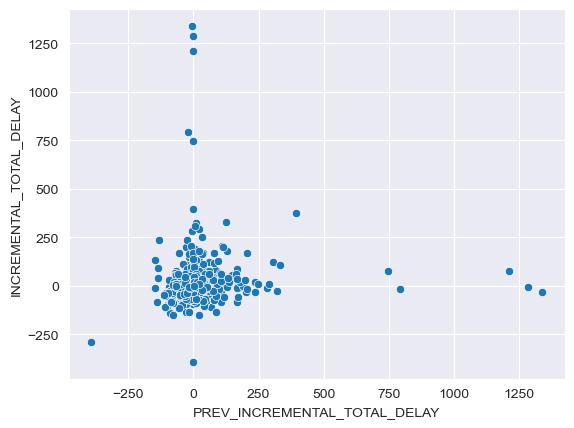

In [68]:
import seaborn as sns


sns.scatterplot(data=bayes_df, x='PREV_INCREMENTAL_TOTAL_DELAY',y='INCREMENTAL_TOTAL_DELAY')

<Axes: >

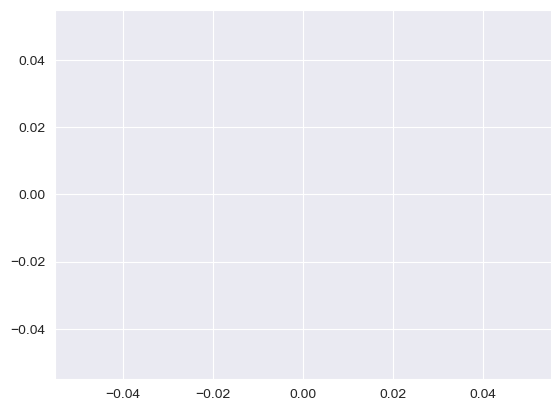

In [69]:
sns.scatterplot(data=bayes_df[bayes_df['PTCAR_LG_NM_NL'] == 'BRUSSEL-MARIA-AALTER'], x='PREV_INCREMENTAL_TOTAL_DELAY',y='INCREMENTAL_TOTAL_DELAY')

In [70]:
import jax
import pymc as pm
import pytensor
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import arviz as az
from tqdm.notebook import tqdm
import pandas as pd
import pymc_experimental.statespace as pmss

import warnings
warnings.filterwarnings('ignore', message='The RandomType SharedVariables')
warnings.filterwarnings('ignore', message='Skipping `CheckAndRaise` Op')


import numpy as np
seed = sum(map(ord, 'Fun with VARS'))
rng = np.random.default_rng()


In [71]:
bayes_df[['PREV_PTCAR_LG_NM_NL','PTCAR_LG_NM_NL']].value_counts()

PREV_PTCAR_LG_NM_NL  PTCAR_LG_NM_NL
AALTER               BELLEM            18
BEERNEM              MARIA-AALTER      18
OOSTKAMP             BEERNEM           18
MARIA-AALTER         AALTER            18
HANSBEKE             LANDEGEM          18
                                       ..
HOBOKEN-POLDER       ANTWERPEN-ZUID     1
                     HEMIKSEM           1
NIEL                 SCHELLE            1
                     BOOM               1
PUURS                BORNEM             1
Name: count, Length: 93, dtype: int64

In [72]:
bayes_prev_df = bayes_prev_df[bayes_prev_df.index.isin(bayes_df['DATETIME_ARRIVAL_PLANNED'])]

In [73]:
bayes_df

,DATETIME_ARRIVAL_PLANNED,INCREMENTAL_TOTAL_DELAY,PREV_PTCAR_LG_NM_NL,PTCAR_LG_NM_NL,RELATION_DIRECTION,PREV_INCREMENTAL_TOTAL_DELAY
2,2024-03-01 13:29:00,106.0,BRUGGE,OOSTKAMP,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
3,2024-03-01 13:32:00,-20.0,OOSTKAMP,BEERNEM,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
4,2024-03-01 13:34:00,-3.0,BEERNEM,MARIA-AALTER,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
5,2024-03-01 13:37:00,-51.0,MARIA-AALTER,AALTER,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
6,2024-03-01 13:38:00,16.0,AALTER,BELLEM,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
...,...,...,...,...,...,...
74709,2024-03-02 10:29:00,-7.0,SINT-NIKLAAS-OOST,NIEUWKERKEN-WAAS,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,-16.0
74710,2024-03-02 10:32:00,36.0,NIEUWKERKEN-WAAS,BEVEREN(WAAS),IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,34.0
74711,2024-03-02 10:35:00,9.0,BEVEREN(WAAS),MELSELE,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,21.0
74712,2024-03-02 10:38:00,-83.0,MELSELE,ZWIJNDRECHT,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,-87.0


In [74]:
bayes_df

,DATETIME_ARRIVAL_PLANNED,INCREMENTAL_TOTAL_DELAY,PREV_PTCAR_LG_NM_NL,PTCAR_LG_NM_NL,RELATION_DIRECTION,PREV_INCREMENTAL_TOTAL_DELAY
2,2024-03-01 13:29:00,106.0,BRUGGE,OOSTKAMP,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
3,2024-03-01 13:32:00,-20.0,OOSTKAMP,BEERNEM,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
4,2024-03-01 13:34:00,-3.0,BEERNEM,MARIA-AALTER,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
5,2024-03-01 13:37:00,-51.0,MARIA-AALTER,AALTER,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
6,2024-03-01 13:38:00,16.0,AALTER,BELLEM,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,0.0
...,...,...,...,...,...,...
74709,2024-03-02 10:29:00,-7.0,SINT-NIKLAAS-OOST,NIEUWKERKEN-WAAS,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,-16.0
74710,2024-03-02 10:32:00,36.0,NIEUWKERKEN-WAAS,BEVEREN(WAAS),IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,34.0
74711,2024-03-02 10:35:00,9.0,BEVEREN(WAAS),MELSELE,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,21.0
74712,2024-03-02 10:38:00,-83.0,MELSELE,ZWIJNDRECHT,IC 02: OOSTENDE -> ANTWERPEN-CENTRAAL,-87.0


In [75]:
#Current fix for when duplicate same time
bayes_df.drop_duplicates(subset='DATETIME_ARRIVAL_PLANNED', inplace=True)

/var/folders/8b/k_mrx8r90yx3tg__c72r53zc0000gn/T/ipykernel_80176/1884225041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes_df.drop_duplicates(subset='DATETIME_ARRIVAL_PLANNED', inplace=True)


In [76]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [77]:
brussel_code = station_encodings['PREV_PTCAR_LG_NM_NL'].cat.categories.get_loc('OOSTKAMP')
brussel_code

42

In [78]:
dense_adjacencies = sparse_adjacencies.todense()
dense_adjacencies.shape

(93, 93)

In [79]:
sparse_adjacencies.getrow(brussel_code).todense()

matrix([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [80]:

mapped_adjacencies = np.array(dense_adjacencies[bayes_df['PTCAR_LG_NM_NL'].cat.codes, :])
mapped_adjacencies.shape

(646, 93)

In [81]:
bayes_df.DATETIME_ARRIVAL_PLANNED.value_counts()

DATETIME_ARRIVAL_PLANNED
2024-03-01 13:29:00    1
2024-03-01 18:27:00    1
2024-03-01 19:21:00    1
2024-03-01 19:28:00    1
2024-03-01 19:35:00    1
                      ..
2024-03-01 08:02:00    1
2024-03-01 08:03:00    1
2024-03-01 08:08:00    1
2024-03-01 08:15:00    1
2024-03-02 10:42:00    1
Name: count, Length: 646, dtype: int64

In [82]:
bayes_df.shape

(646, 6)

In [83]:
(bayes_prev_df.values[:,] * np.ones(n)).T.shape

(93, 646)

In [84]:
bayes_prev_df.values.shape

(646, 93)

In [85]:
bayes_df['INCREMENTAL_TOTAL_DELAY'].shape

(646,)

In [86]:
n

93

In [87]:
mapped_adjacencies.shape

(646, 93)

In [88]:
mapped_adjacencies[0,:].reshape(-1).shape

(93,)

In [89]:
mapped_adjacencies.shape

(646, 93)

In [90]:
bayes_prev_df.values.shape

(646, 93)

In [91]:
(mapped_adjacencies @ bayes_prev_df.values.T).shape

(646, 646)

In [94]:
np.sum(mapped_adjacencies * bayes_prev_df.values, axis=1).shape

(646,)

In [95]:
mapped_adjacencies.shape

(646, 93)

In [166]:
bayes_df['INCREMENTAL_TOTAL_DELAY'].shape

(646,)

# Create PYMC Markov Model to predict Delay

In [97]:
import pymc as pm
from pymc import HalfCauchy, Model, Normal, sample

with pm.Model() as model:
    data = pm.Data("curr", bayes_df['INCREMENTAL_TOTAL_DELAY'])
    node_i = pm.Data("node_i", bayes_df['PTCAR_LG_NM_NL'].cat.codes)
    node_j = pm.Data("node_j", bayes_df['PREV_PTCAR_LG_NM_NL'].cat.codes)
    prev = pm.Data("prev", bayes_df['PREV_INCREMENTAL_TOTAL_DELAY'])
    alphas = pm.Normal('alphas', mu=0, shape=(n_prev,n_curr))
    beta = pm.Normal('betas', mu=0, sigma=10 )
    
    # Expected value of outcome
    mu = alphas[node_j, node_i] + beta * prev
    pm.Normal("y", mu=mu, sigma=1, observed=data)
    
with pm.Model() as advanced:
    data = pm.Data("curr", bayes_df['INCREMENTAL_TOTAL_DELAY'])
    data_recent = pm.Data("recent", bayes_prev_df.values)
    node_c = pm.Data("node_i", bayes_df['PTCAR_LG_NM_NL'].cat.codes)
    node_p = pm.Data("node_j", bayes_df['PREV_PTCAR_LG_NM_NL'].cat.codes)
    alphas = pm.Normal('alphas', mu=0, shape=(n_prev,n_curr))
    betas = pm.Normal('betas', mu=0, sigma=10, shape=n )
    
    adjacencies = pm.Data("adjacencies", mapped_adjacencies)
    
    #pm.math.dot(X, beta)
    # Expected value of outcome
    #alphas[node_p, node_c] + 
    mu =  alphas[node_p, node_c] + pm.math.sum(adjacencies * (data_recent * betas), axis=1)
    #mu = (adjacencies @ (data_recent[:,] * betas[:, None]).T)
    pm.Normal("y", mu=mu, sigma=1, observed=data)
    #trace = pm.sample(draws=10, tune=0, chains=1, progressbar=False, random_seed=RANDOM_SEED)


Only 10 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alphas, betas]
Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of samples is too small to check convergence reliably.


In [98]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [99]:
advanced

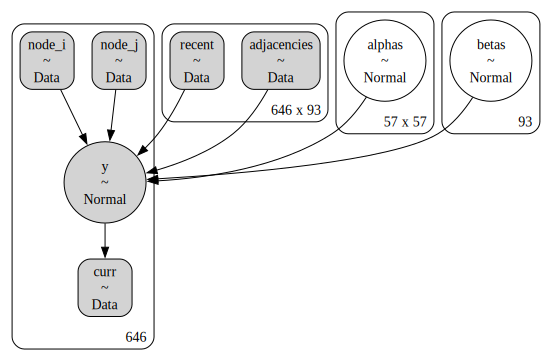

In [100]:
pm.model_to_graphviz(advanced)

In [101]:
from fastprogress import fastprogress
fastprogress.printing = lambda: True

In [102]:
with advanced:
    # draw 100 posterior samples using NUTS sampling
    idata = sample(100, progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alphas, betas]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


In [103]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

array([[<Axes: title={'center': 'alphas'}>,
        <Axes: title={'center': 'alphas'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

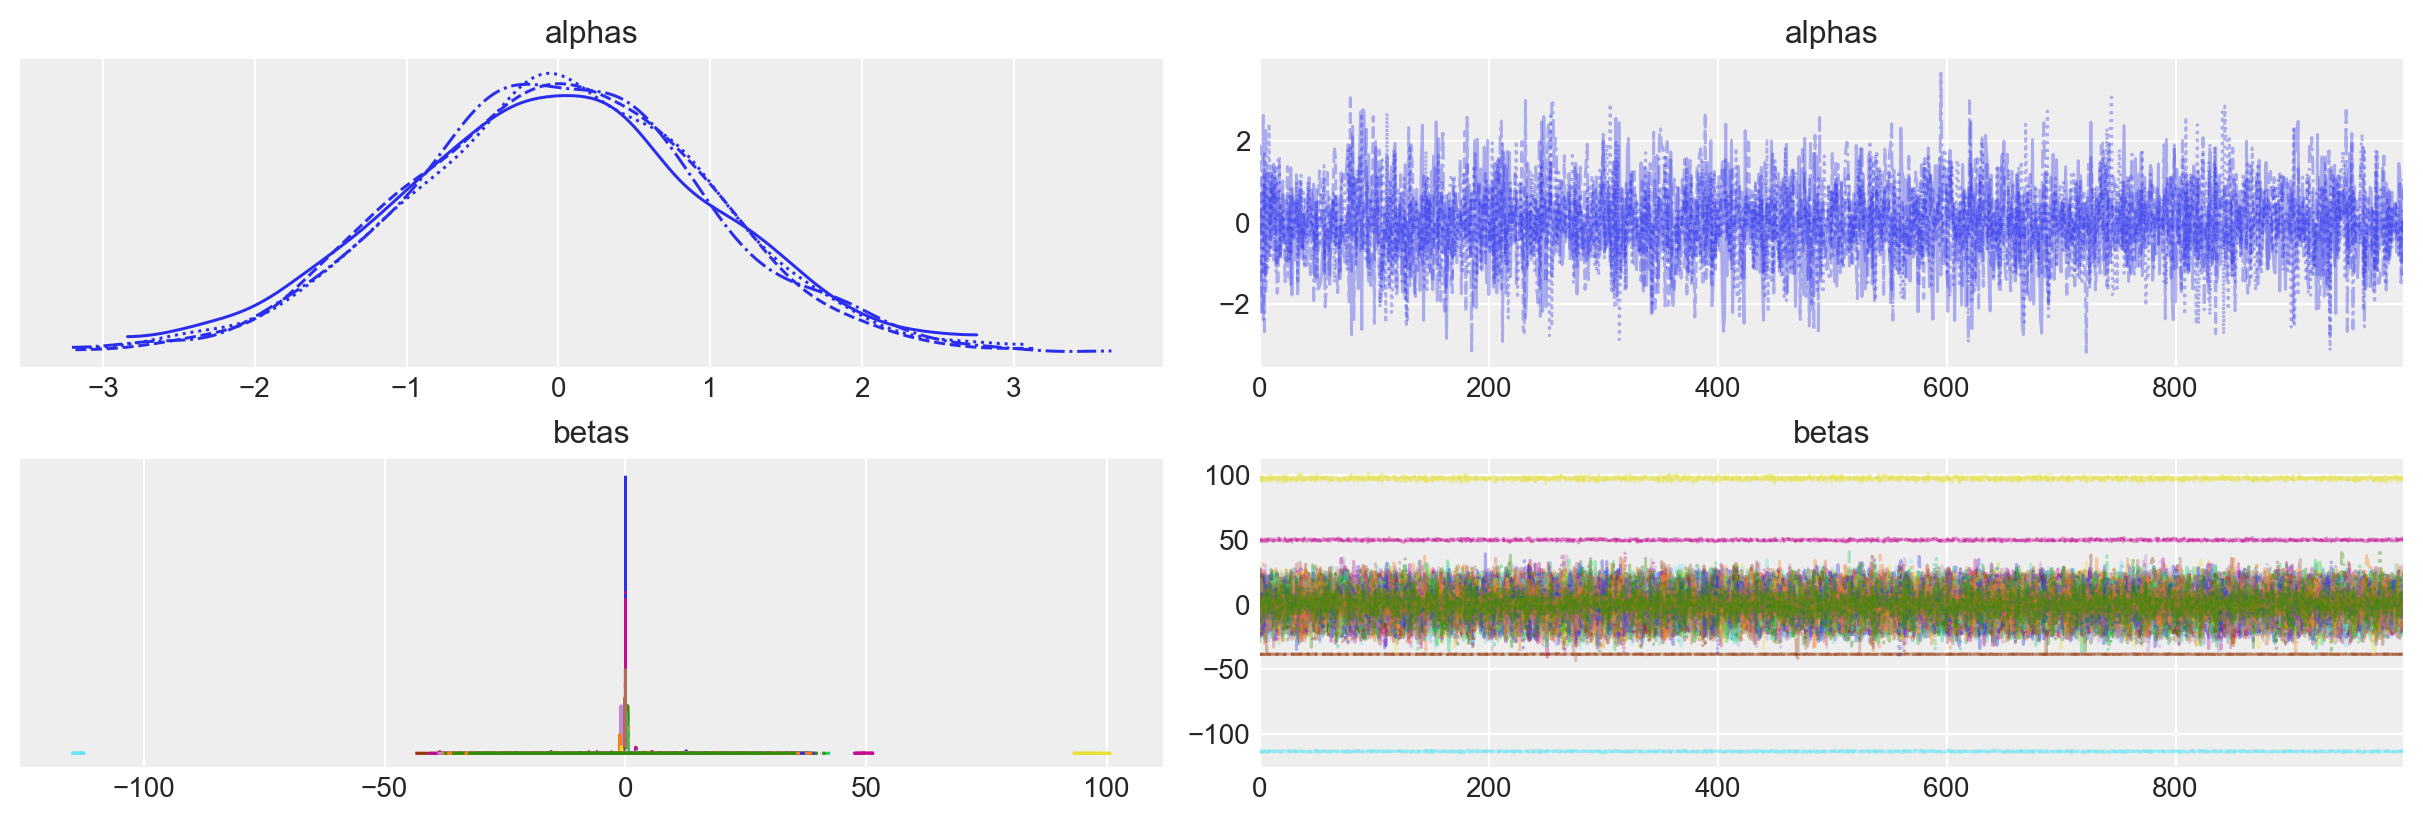

In [105]:
az.plot_trace(idata, coords={'alphas_dim_0':0, 'alphas_dim_1':1},)

In [106]:
dense_adjacencies[0,:]

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [107]:
dense_adjacencies[0,:].nonzero()

(array([0, 0]), array([ 6, 32]))

array([[<Axes: title={'center': 'alphas'}>,
        <Axes: title={'center': 'alphas'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

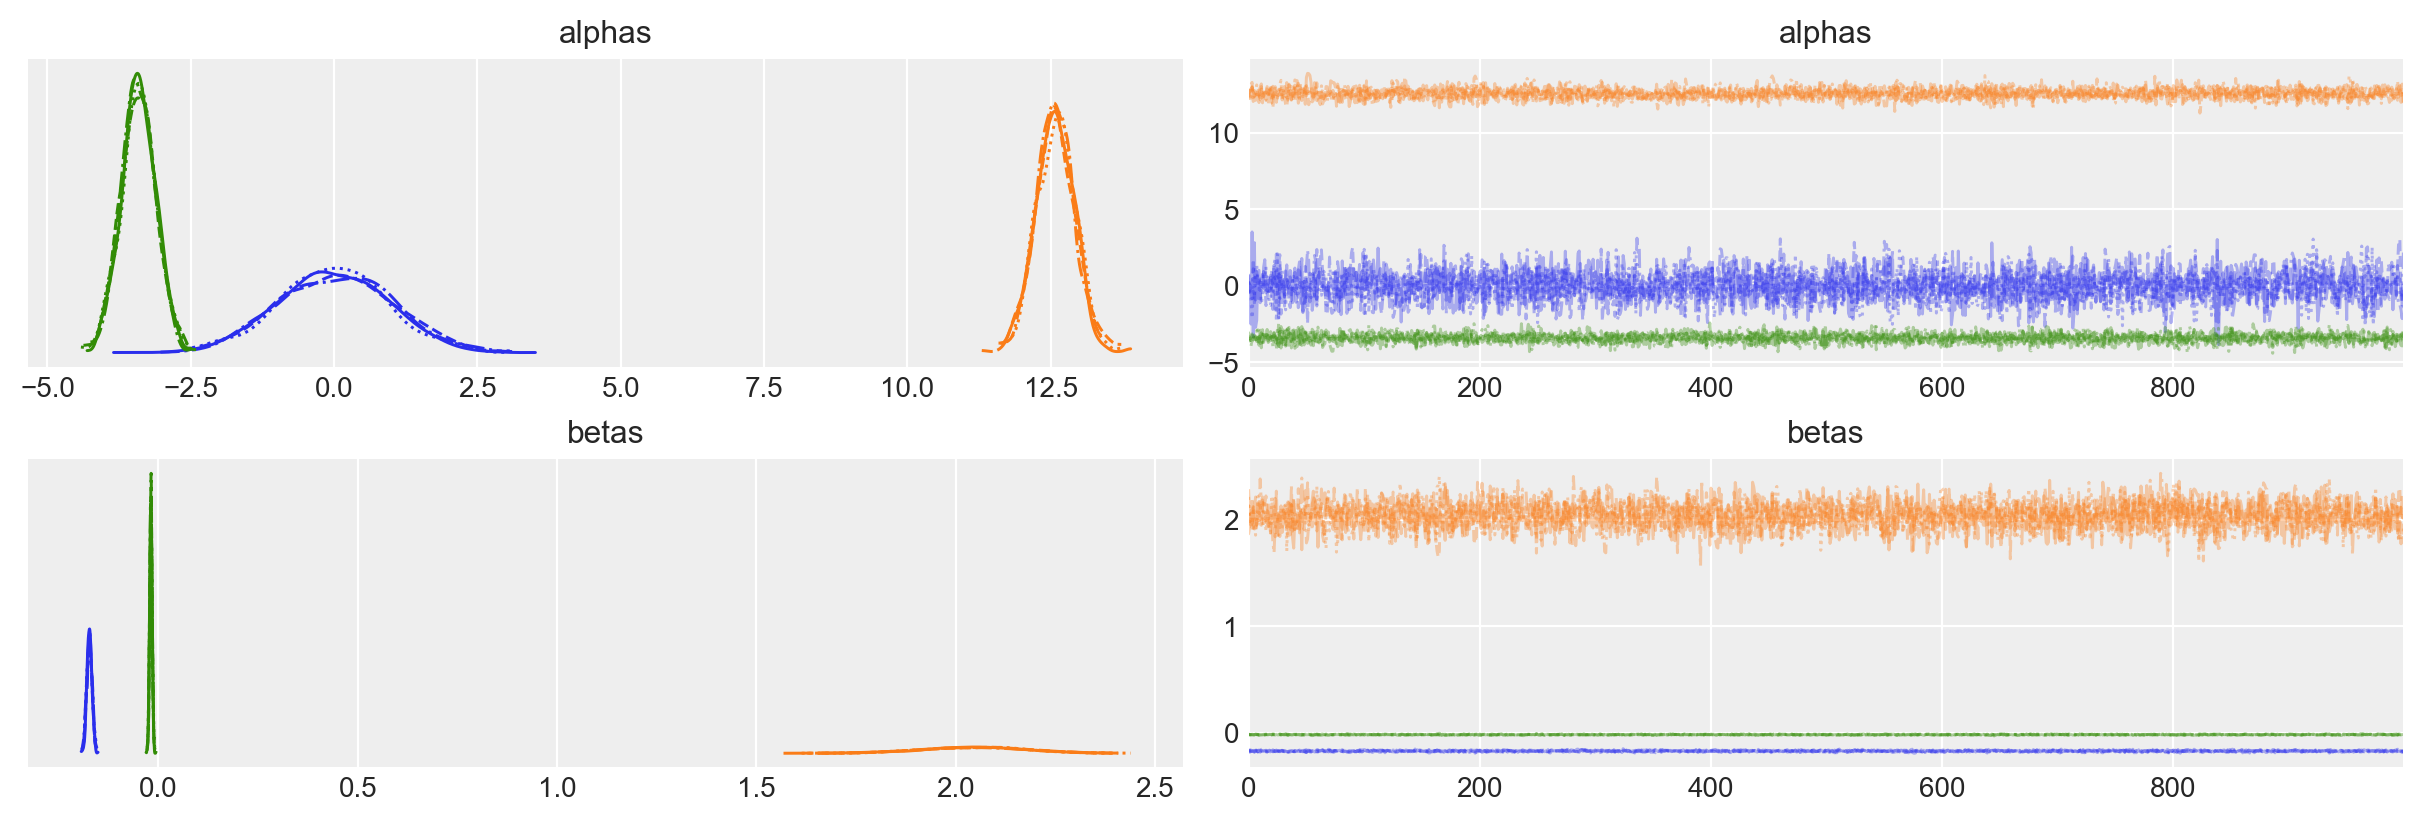

In [113]:
az.plot_trace(idata, coords={'alphas_dim_0':[0], 'alphas_dim_1':[0,6,32],'betas_dim_0':[0,6,32]})

array([[<Axes: title={'center': 'alphas'}>,
        <Axes: title={'center': 'alphas'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

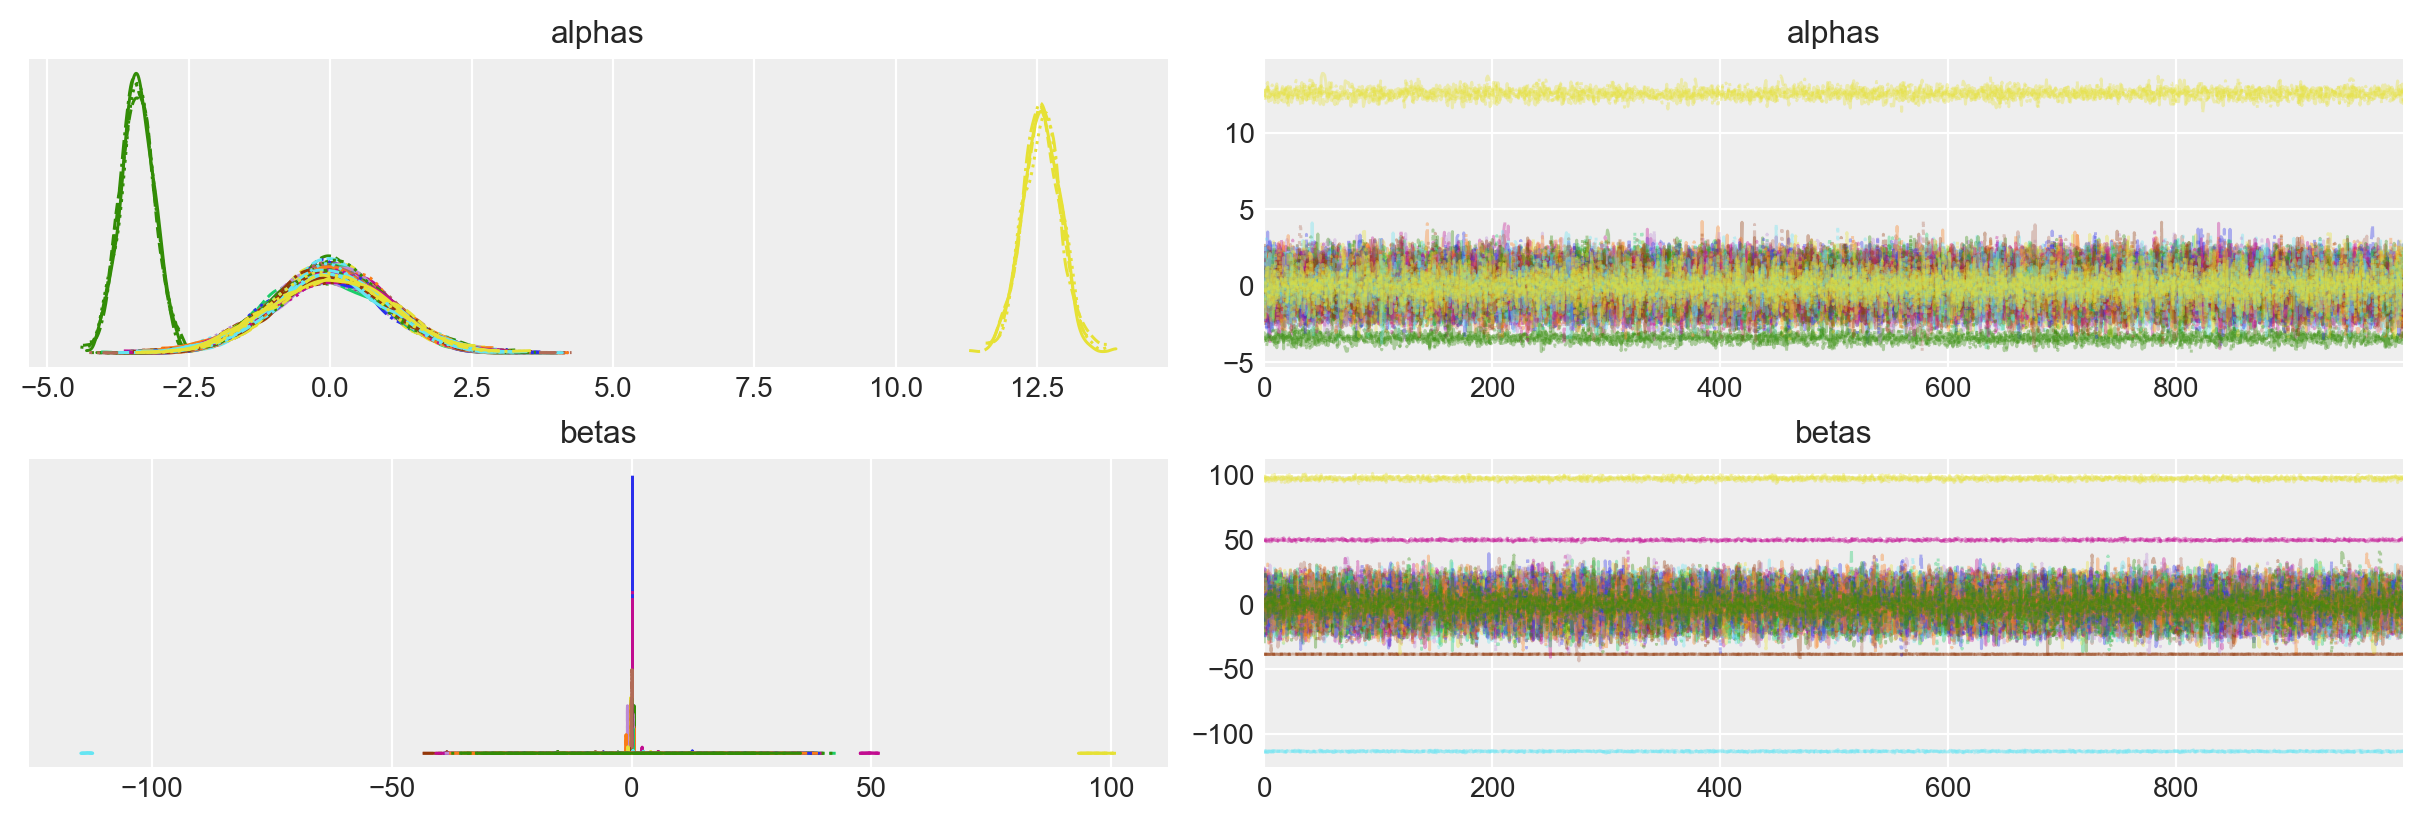

In [111]:
az.plot_trace(idata, coords={'alphas_dim_0':0},)

In [184]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [150]:
predictions = pm.sample_posterior_predictive(idata, model=advanced, random_seed=RANDOM_SEED)

Sampling: [y]


Output()

In [163]:
predictions = pm.sample_posterior_predictive(idata, predictions=True, model=advanced)
predictions

Sampling: [y]


Output()

Inference data with groups:
	> predictions
	> predictions_constant_data

In [186]:
predictions['predictions']['y']

<xarray.DataArray 'y' (chain: 4, draw: 1000, y_dim_2: 646)> Size: 21MB
array([[[ 3.32677105e+01, -1.00946878e+01, -7.56426336e+00, ...,
          7.96457237e+00, -7.59476902e+01,  2.52071362e+00],
        [ 3.36488631e+01, -9.94848476e+00, -6.40846573e+00, ...,
          8.70780908e+00, -7.60976427e+01, -4.19536935e-01],
        [ 3.34503770e+01, -9.61419423e+00, -6.47163518e+00, ...,
          9.68686179e+00, -7.58623550e+01,  1.57695937e+00],
        ...,
        [ 3.54013419e+01, -8.64138722e+00, -7.27412355e+00, ...,
          8.20235362e+00, -7.50912799e+01, -1.77312519e-02],
        [ 3.49290518e+01, -8.91704216e+00, -6.98829097e+00, ...,
          1.00357924e+01, -7.50174857e+01,  2.28597354e+00],
        [ 3.36086544e+01, -1.04535160e+01, -6.44595299e+00, ...,
          7.70166931e+00, -7.48002070e+01, -9.92523475e-01]],

       [[ 3.72047321e+01, -7.02955501e+00, -6.65270405e+00, ...,
          8.85322445e+00, -7.40726951e+01, -1.61221503e+00],
        [ 3.26028574e+01, -1.06036155e+01, -6.54361355e+00, ...,
          1.05082591e+01, -7.72508947e+01,  9.33435305e-01],
        [ 3.52031793e+01, -9.38912748e+00, -7.24315788e+00, ...,
          1.13642055e+01, -7.73681608e+01, -2.35049962e-01],
...
        [ 3.25000478e+01, -9.66861501e+00, -7.23069357e+00, ...,
          8.80489378e+00, -7.55402055e+01, -3.56434670e-01],
        [ 3.40574416e+01, -8.28250044e+00, -4.80262297e+00, ...,
          1.04945182e+01, -7.62960842e+01,  3.14015272e+00],
        [ 3.17947456e+01, -8.40309627e+00, -6.97161362e+00, ...,
          1.06156145e+01, -7.43037056e+01,  1.33061133e+00]],

       [[ 3.48242669e+01, -8.98826061e+00, -5.36080640e+00, ...,
          7.97482991e+00, -7.37761307e+01,  1.44618985e+00],
        [ 3.14907134e+01, -1.00900776e+01, -5.24344544e+00, ...,
          9.74686396e+00, -7.44226296e+01,  9.38338184e-01],
        [ 3.40791465e+01, -9.04926389e+00, -5.46858906e+00, ...,
          8.05971022e+00, -7.71802476e+01,  4.70709838e-01],
        ...,
        [ 3.43338778e+01, -8.90948806e+00, -5.05917893e+00, ...,
          8.10929131e+00, -7.83490695e+01,  1.73690620e+00],
        [ 3.48702634e+01, -9.74870910e+00, -6.23678360e+00, ...,
          8.07356012e+00, -7.45040637e+01,  2.43964410e+00],
        [ 3.46834660e+01, -9.82969593e+00, -5.04506976e+00, ...,
          1.02181018e+01, -7.67163144e+01,  5.09367891e-01]]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * y_dim_2  (y_dim_2) int64 5kB 0 1 2 3 4 5 6 7 ... 639 640 641 642 643 644 645

In [185]:
predictions['predictions_constant_data']['recent'].shape

(646, 93)

In [175]:
predictions['predictions_constant_data']['curr']

<xarray.DataArray 'curr' (curr_dim_0: 646)> Size: 5kB
array([ 1.060e+02, -2.000e+01, -3.000e+00, -5.100e+01,  1.600e+01,
       -1.900e+01, -3.900e+01, -2.600e+01,  6.300e+01, -9.400e+01,
       -1.100e+01,  7.000e+00,  1.287e+03,  1.200e+01,  7.000e+00,
       -1.900e+01,  1.500e+01, -2.800e+01, -8.000e+00,  3.700e+01,
        3.000e+00, -7.900e+01,  1.300e+01, -3.900e+01, -6.100e+01,
        2.100e+01, -2.700e+01, -2.500e+01,  1.190e+02, -1.000e+01,
       -2.300e+01, -5.800e+01, -2.800e+01, -1.600e+01, -8.000e+00,
        0.000e+00, -1.800e+01, -8.000e+00,  3.000e+00,  6.900e+01,
        6.000e+00, -7.200e+01,  3.800e+01, -1.000e+02,  7.000e+00,
        7.000e+00, -8.300e+01,  1.100e+01, -2.400e+01,  4.900e+01,
       -2.700e+01, -2.500e+01,  1.400e+01, -1.000e+01, -8.000e+00,
        9.000e+00, -3.000e+01,  1.160e+02,  4.600e+01,  2.700e+01,
        7.600e+01,  8.000e+01, -6.000e+00, -1.100e+02,  2.000e+01,
       -4.600e+01,  3.800e+01, -9.900e+01,  6.000e+00,  5.000e+00,
       -8.100e+01,  2.800e+01, -2.200e+01, -5.000e+00, -1.130e+02,
        1.500e+01, -2.200e+01, -3.900e+01, -4.000e+01,  7.200e+01,
        1.680e+02, -3.000e+00,  9.000e+00, -8.700e+01,  1.600e+01,
       -1.000e+00, -2.700e+01, -1.300e+01,  1.300e+01,  2.000e+01,
       -1.300e+01,  3.900e+01,  2.010e+02, -7.700e+01,  2.100e+01,
       -6.600e+01, -2.000e+01, -4.500e+01, -3.200e+01, -2.500e+01,
...
       -3.930e+02,  1.000e+00,  1.200e+01,  2.000e+00,  9.000e+00,
       -1.100e+01,  7.600e+01,  1.680e+02,  1.360e+02,  1.213e+03,
        5.000e+00, -1.100e+01,  1.500e+01,  2.100e+01,  3.950e+02,
        4.600e+01,  1.000e+01,  4.000e+00,  1.000e+00,  3.000e+00,
        9.000e+00,  1.100e+01,  1.400e+01,  2.100e+01, -4.700e+01,
        2.100e+01, -3.400e+01,  3.310e+02, -1.400e+01,  8.000e+00,
        3.700e+01,  1.300e+01,  2.490e+02, -3.000e+00, -9.000e+00,
       -3.000e+00,  1.070e+02, -3.100e+01,  1.000e+00,  4.000e+00,
        1.000e+01,  9.000e+00, -3.000e+00,  3.900e+01, -6.600e+01,
       -5.300e+01,  1.400e+01, -3.800e+01,  5.800e+01, -2.890e+02,
        9.900e+01,  2.100e+01,  2.000e+00,  1.000e+01, -8.000e+00,
        2.900e+01,  3.300e+01,  1.900e+01,  7.800e+01,  3.100e+01,
       -7.000e+00,  1.400e+01,  1.780e+02,  3.760e+02,  6.000e+01,
        6.300e+01,  3.000e+00,  4.000e+01,  4.000e+00,  1.200e+01,
        4.500e+01,  4.900e+01, -3.400e+01, -1.600e+01,  0.000e+00,
       -4.900e+01,  2.300e+01, -2.100e+01, -4.100e+01, -3.600e+01,
        6.100e+01,  4.000e+01, -6.000e+00,  1.300e+01,  4.400e+01,
        2.000e+01, -7.000e+00,  4.300e+01, -1.300e+01,  1.700e+01,
       -2.300e+01, -7.000e+00,  3.600e+01,  9.000e+00, -8.300e+01,
        1.000e+00])
Coordinates:
  * curr_dim_0  (curr_dim_0) int64 5kB 0 1 2 3 4 5 6 ... 640 641 642 643 644 645

In [174]:
predictions['predictions']['y'][-1,-1,:] - predictions['predictions_constant_data']['curr']

<xarray.DataArray (y_dim_2: 646, curr_dim_0: 646)> Size: 3MB
array([[ -71.31653398,   54.68346602,   37.68346602, ...,   25.68346602,
         117.68346602,   33.68346602],
       [-115.82969593,   10.17030407,   -6.82969593, ...,  -18.82969593,
          73.17030407,  -10.82969593],
       [-111.04506976,   14.95493024,   -2.04506976, ...,  -14.04506976,
          77.95493024,   -6.04506976],
       ...,
       [ -95.78189818,   30.21810182,   13.21810182, ...,    1.21810182,
          93.21810182,    9.21810182],
       [-182.71631443,  -56.71631443,  -73.71631443, ...,  -85.71631443,
           6.28368557,  -77.71631443],
       [-105.49063211,   20.50936789,    3.50936789, ...,   -8.49063211,
          83.50936789,   -0.49063211]])
Coordinates:
    chain       int64 8B 3
    draw        int64 8B 999
  * y_dim_2     (y_dim_2) int64 5kB 0 1 2 3 4 5 6 ... 640 641 642 643 644 645
  * curr_dim_0  (curr_dim_0) int64 5kB 0 1 2 3 4 5 6 ... 640 641 642 643 644 645

In [183]:
predictions['predictions_constant_data'].node_i

<xarray.DataArray 'node_i' (node_i_dim_0: 646)> Size: 3kB
array([42,  4, 32,  0,  6, 20, 27, 14, 17, 19, 18, 16,  5, 28, 29, 49, 51,
       52, 41,  8, 36, 56,  2,  1,  2, 56, 36,  8, 41, 52, 51,  7, 29, 28,
        5, 16, 18, 19, 17, 14, 27, 20,  6,  0, 32,  4, 42, 11,  2, 56, 36,
        8, 41, 52, 51,  7, 29, 28,  5, 16, 18, 19, 17, 14, 27, 20,  6,  0,
       32,  4, 42, 11,  4, 32,  0,  6, 20, 27, 14, 17, 19, 18, 16,  5, 28,
       29, 49,  7, 51, 52, 41,  8, 36, 56,  2,  1,  2, 56, 36,  8, 41, 52,
       51,  7, 29, 28,  5, 16, 18, 19, 17, 14, 27, 20,  6,  0, 32,  4, 42,
       11,  4, 32,  0,  6, 20, 27, 14, 17, 19, 16,  5, 28, 29, 49,  7, 51,
       53, 10, 44, 45,  9, 40, 46, 21, 22,  2,  1,  2, 56, 36,  8, 41, 52,
       51,  7, 29, 28,  5, 16, 18, 19, 17, 14, 27, 20,  6,  0, 32,  4, 42,
       11,  2, 56, 36,  8, 41, 52, 51,  7, 29, 28,  5, 16, 18, 19, 17, 27,
       20,  6,  4, 11, 56, 41, 51,  7, 29, 28,  5, 16, 18, 19, 17, 27, 20,
        6,  4, 11,  2, 41, 51,  7, 49, 29, 28,  5, 16, 18, 19, 17, 14, 27,
       20,  6,  0,  4, 42, 11,  2, 56, 36, 41, 51,  7, 29, 28,  5, 16, 18,
       19, 17, 14, 27, 20,  6,  0, 32,  4, 42, 11, 49, 29, 28,  5, 16, 18,
       19, 17, 14, 27, 20,  6,  0, 32,  4, 11,  2, 56,  8, 41, 51,  7, 29,
       28,  5, 16, 18, 19, 17, 14, 27, 20,  6,  0,  4, 11,  2, 56, 36,  8,
       52,  7, 29, 28,  5, 16, 18, 19, 17, 14, 27, 20,  6,  0, 32,  4, 11,
       56, 41, 29,  5, 18, 19, 17, 14, 27, 20,  6,  0,  2, 56, 36,  8, 41,
       52, 51,  7, 29, 28,  5, 16, 18, 19, 17, 14, 27, 20,  6,  0, 32,  4,
       42, 11,  2, 56, 41, 51,  7, 29,  5, 16, 18, 19, 17, 14, 27,  6,  0,
       32, 42, 11,  2, 22, 21, 46, 40,  9, 45, 44, 10, 53, 51,  7, 29, 28,
        5, 16, 18, 19, 17, 14, 27, 20,  6,  0, 32,  4, 42,  2,  8, 41, 51,
        7, 29, 28,  5, 16, 18, 19, 17, 14, 27, 20,  6,  0, 32,  4, 42, 11,
       56, 36,  8, 41, 52, 51,  7, 49, 29, 28,  5, 16, 18, 19, 17, 14, 27,
       20,  6,  4, 11, 42,  0,  6, 17, 18, 16,  5, 28, 29, 41, 56,  2,  1,
       32,  0,  6, 27, 17, 18,  5,  7, 52, 41, 36, 56,  2,  1, 42, 32,  0,
        6, 27, 17, 18, 16,  5, 28, 29, 41, 56,  2,  1,  0, 18, 16,  5, 28,
       29, 41, 56,  2,  1, 16,  5, 28, 29, 56,  2,  1,  0, 17, 16,  5, 28,
       29, 49, 41,  1,  0, 17, 18, 16,  5, 28, 29,  1, 42,  0,  6, 27, 17,
       16,  5, 28, 29, 41,  0, 17, 18, 16,  5, 28, 29, 49,  1,  0, 19, 18,
       16,  5, 28, 29,  1,  0, 17, 18, 16,  5, 28, 29, 52, 36, 56,  2,  1,
        4, 32,  0,  6, 27, 17, 37, 35, 26, 54, 47, 55, 48, 43, 13,  3, 12,
       31, 30, 24, 33, 34, 50, 15, 25, 23, 39, 38,  1, 42,  0,  6, 27, 17,
       18, 16,  5, 28, 29, 49, 20, 14, 17, 16,  5, 28, 29,  1, 42,  4, 32,
        0,  6, 27, 17, 37, 35, 26, 54, 47, 55, 48, 43, 13,  3, 12, 31, 30,
       24, 33, 34, 50, 15, 25, 23, 39, 38,  1, 42,  4, 32,  0,  6, 20, 27,
       14, 17, 19, 18, 16,  5, 28, 29, 49,  7, 51, 52, 41,  8, 36, 56,  2],
      dtype=int32)
Coordinates:
  * node_i_dim_0  (node_i_dim_0) int64 5kB 0 1 2 3 4 5 ... 641 642 643 644 645

In [ ]:
az.plot_ppc(data, data_pairs={"y":"y"})

In [176]:
predictions['predictions_constant_data'][coords={'node_i_dim_0':0}]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2610718720.py, line 1)

In [165]:
predictions

Inference data with groups:
	> predictions
	> predictions_constant_data

In [155]:
predictions['y'].shape

KeyError: 'y'

In [126]:
posterior_predictive = pm.sample_posterior_predictive(idata, model=advanced, random_seed=RANDOM_SEED)
predicted_values = posterior_predictive['Y'].mean(axis=0)  # Take the mean of posterior predictive samples

observed_values = bayes_df['INCREMENTAL_TOTAL_DELAY']

Sampling: [y]


Output()

KeyError: 'Y'

In [121]:
observed_values

NameError: name 'observed_values' is not defined

In [115]:
# Plot predicted vs observed values
plt.figure(figsize=(10, 6))
plt.plot(observed_values, label='Observed', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.xlabel('Data Point Index')
plt.ylabel('Delay')
plt.legend()
plt.title('Observed vs Predicted Values')
plt.show()

NameError: name 'observed_values' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = raw_trains_df[['DATETIME_DEPARTURE_PLANNED', 'RELATION', 'INCREMENTAL_DELAY']]
data.set_index('DATETIME_DEPARTURE_PLANNED', inplace=True)
colors = plt.get_cmap('Dark2').colors

# Counter to limit the number of plots
max_plots = 10
plot_count = 0

for i, (relation, group) in enumerate(data.groupby('RELATION')):
    plt.figure(figsize=(14, 4))  # Set figure size for each plot
    group['INCREMENTAL_DELAY'].plot(title=f"Relation: {relation}", color=colors[i % len(colors)])
    plt.title(f"Relation: {relation}")
    
    plt.tight_layout()  # Adjust layout to fit the plot
    plt.show()  # Show each plot individually
    plot_count += 1
    if plot_count >= max_plots:
        break


In [ ]:
data

In [ ]:
model_data = raw_trains_df[['DATETIME_DEPARTURE_PLANNED', 'DATETIME_ARRIVAL_PLANNED','RELATION','DELAY_DEP','DELAY_ARR','INCREMENTAL_DELAY']][:1000]

# Convert datetime to numerical features (seconds since midnight)
def seconds_since_midnight(dt):
    return dt.dt.hour * 3600 + dt.dt.minute * 60 + dt.dt.second

raw_trains_df['planned_dep_seconds'] = seconds_since_midnight(raw_trains_df['DATETIME_DEPARTURE_PLANNED'])
raw_trains_df['planned_arr_seconds'] = seconds_since_midnight(raw_trains_df['DATETIME_ARRIVAL_PLANNED'])

# Drop rows with missing delay data
train_data = raw_trains_df.dropna(subset=['DELAY_DEP', 'DELAY_ARR'])

# Encode the 'RELATION' (trip_id) as a categorical variable
train_data['relation_encoded'] = train_data['RELATION'].astype('category').cat.codes

# Feature variables
planned_dep = train_data['planned_dep_seconds'].values
planned_arr = train_data['planned_arr_seconds'].values
relation_encoded = train_data['relation_encoded'].values

# Target variables
delay_dep = train_data['DELAY_DEP'].values
delay_arr = train_data['DELAY_ARR'].values

In [ ]:
#sm_mod = sm.tsa.VARMAX(data, order=(2, 0), trend="n")
#sm_res = sm_mod.fit(disp=0)
# sm_res.summary()

In [ ]:
import pymc as pm
import numpy as np

# Get the number of unique relations
n_unique_relations = len(np.unique(relation_encoded))

with pm.Model() as simple_ar_model:

    # Priors for coefficients of planned departure and arrival
    beta_dep = pm.Normal('beta_dep', mu=0, sigma=10)
    beta_arr = pm.Normal('beta_arr', mu=0, sigma=10)

    # Categorical variable for relation/trip effect (ensure shape matches the number of unique relations)
    relation_effect = pm.Normal('relation_effect', mu=0, sigma=10, shape=n_unique_relations)

    # Noise term (standard deviation for the delays)
    sigma_dep = pm.HalfNormal('sigma_dep', sigma=10)
    sigma_arr = pm.HalfNormal('sigma_arr', sigma=10)

    # Autoregressive model for departure delay
    mu_dep = (beta_dep * planned_dep + 
              beta_arr * planned_arr + 
              relation_effect[relation_encoded])

    # Autoregressive model for arrival delay
    mu_arr = (beta_dep * planned_dep + 
              beta_arr * planned_arr + 
              relation_effect[relation_encoded])

    # Likelihood
    delay_dep_obs = pm.Normal('delay_dep_obs', mu=mu_dep, sigma=sigma_dep, observed=delay_dep)
    delay_arr_obs = pm.Normal('delay_arr_obs', mu=mu_arr, sigma=sigma_arr, observed=delay_arr)

    # Sample from the posterior
    trace = pm.sample(1000, tune=1000)


# Test AR Model

In [ ]:
with model:
    prior = pm.sample_prior_predictive(
        samples=100,
        random_seed=rng,
    )

In [ ]:
for hdi_prob in (0.94, 0.94):
    hdi = az.hdi(prior.prior["ar"], hdi_prob=hdi_prob)["ar"]
    lower=hdi.sel(hdi="lower")
    upper=hdi.sel(hdi="higher")
    plt.fill_between(np.arange(trials), y1=lower, y2=upper, alpha=.2, color="C0")
plt.plot(prior.prior["ar"].mean(("chain", "draw")), color="C0");

In [ ]:
_, ax = plt.subplots(1, 4, figsize=(20, 3), sharey=True)
chosen_draw = 1
for i, axi in enumerate(ax, start=chosen_draw):
    axi.plot(prior.prior["ar"].isel(draw=i, chain=0), color="C0" if i == chosen_draw else "k")